In [230]:
%matplotlib inline

from IPython.display import display, Math, Latex
from sympy import *
from sympy.solvers import solve
import numpy as np

# try:
#     import mpld3
#     mpld3.enable_notebook()
#     print("Modul mpld3 is installed.")
# except:
#     print("Modul mpld3 is NOT installed.")

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('text', usetex = True)
mpl.rc('font', family = 'serif', size = 18)

def abs(z):
    z_i = simplify(z.subs(ps, I*x))
    z_re = simplify(re(z_i))
    z_im = simplify(im(z_i))
    z_abs = simplify(sqrt(z_re**2 + z_im**2))
    return z_abs

def xOpt(z, disp = False):
    dz = simplify(diff(z**2, q))
    dz_ = solve(dz, x)
    if disp:
        display(Math(latex(dz_)))
    return dz_

def qOpt(z, x_opt, disp = False):
    z /= r0
    # z = simplify(z.subs(x, sqrt(A)))
    dz = simplify(diff(z**2, x).subs(x, x_opt))
    dz_ = solve(dz, q)
    s = []
    for i in range(len(dz_)):
        # f = dz_[i].subs(A, x_opt**2)
        try:
            f_ = simplify(dz_[i].factor(n))
        except PolynomialError:
            f_ = simplify(dz_[i])
        s.append(f_)
    if disp:
        display(Math(latex(s)))
    return s

def take_real(x, show = False):
    x_ = [y.evalf() for y in x if y.is_real and y.is_positive]
    if show:
        display(Math("S = " + latex(x_)))
    if x_:
        x_ = simplify(x_[0])
    return x_

par = lambda a,b:(a*b)/(a+b)

c, l, rc, rl, cd, ld, rd = symbols('C_{DM} L_{DM} R_c R_l C_d L_d R_d', real = True, positive=True)
s, w, w0, n, ps, q, r0, x, A, zout, pi, fc = symbols('s \omega \omega_0 n p Q R_0 x A |Z_{out}|_{min} \pi f_c', real = True, positive=True)

r0_ = sqrt(l/c)
w0_ = sqrt(1/c/l)
ps_ = s/w0
q_ = rd/r0
x_ = w/w0
display(Math("R_0 = " + latex(r0_) + ", \,\,\,\,\,\,Q = " + latex(q_) + ", \,\,\,\,\,\,\omega_0 = " + latex(w0_) + ", \,\,\,\,\,\,p(s) = " + latex(ps_) + ", \,\,\,\,\,\,x = " + latex(x_)))
display(Math("C_d = n\,C_{DM}, \,\,\,\,\,\, L_d = n\,L_{DM}"))



<IPython.core.display.Math object>

<IPython.core.display.Math object>

## ___Parallel-Damped LC Filter___

![Alt text](imgs/LC_parallel_damped.png)

In [231]:
# Defining Impedances for each Line
z1 = rl + s*l
z2 = rc + 1/s/c
z3 = rd + 1/s/cd

# Output Impedance and Transfer Function
z = par(z1, par(z2,z3))
h = par(z3, z2) / (par(z3,z2) + z1)
z = simplify(z.factor(s))
h = simplify(h.factor(s))
z_ = simplify(z.subs(rl, 0).subs(rc, 0).subs(cd, n*c))
h_ = simplify(h.subs(rl, 0).subs(rc, 0).subs(cd, n*c))

# Taking Middelbrook substitutions
zq = simplify(r0*(ps*(1+ps*q*n))/(1+ps*q*n+ps**2*(n+1)+ps**3*q*n))
zq_abs = abs(zq)
hq = simplify(zq/(ps*r0))
hq_abs = abs(hq)

# Finding optimal x, Q, R0 and Maximum Output Impedance
xopt = xOpt(zq_abs, disp = False)[0]
qopt = simplify(qOpt(zq_abs, xopt, disp = False)[0]); qopt = simplify(qopt.factor(n))
z_max = simplify(zq_abs.subs(q, qopt).subs(x, xopt).factor(n))
r0_opt_ = solve(z_max - zout, r0); r0_opt = take_real(r0_opt_, show = False); #display(Math(latex(ro_opt_)))
n_opt_ = solve(z_max - zout, n); nopt = take_real(n_opt_, show = False); #display(Math(latex(n_opt_)))

fm = fc * sqrt(1-1/2/q**2)

# Finding High Frequency Attenuation Degradation
w0_new = 1/sqrt(l*(c+cd))
w0_deg = simplify((w0_new/w0_).subs(cd, n*c))

c_ = 1 / (2*pi*fc*r0)
l_ = r0 / (2*pi*fc) 

# Defining Curves Z/R0 and f0_new/f0 for n
n_val = np.linspace(0.1, 10, 1024)
z_np = lambdify(n, z_max/r0, 'numpy')
w_np = lambdify(n, w0_deg, 'numpy')
z_val = 20*np.log10(z_np(n_val))
w_val = 20*np.log10(w_np(n_val))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

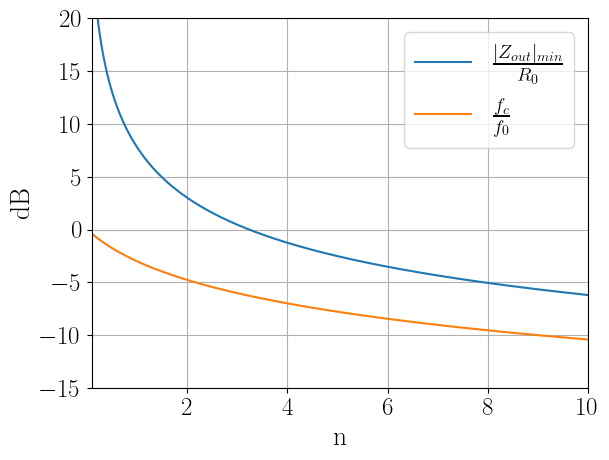

In [232]:
display(Math(r"$Z(s) = " + latex(z) + r"$"))
display(Math(r"$Z(s)|_{R_L, R_C = 0, C_d = nC} = " + latex(z_) + r"$"))
display(Math(r"$H(s)|_{R_L, R_C = 0, C_d = nC} = " + latex(h_) + r"$"))
display(Math(r"$Z(p, Q, n) = " + latex(zq) + r"$"))
display(Math(r"$x_{opt} = \frac{\omega}{\omega_0} = " + latex(xopt) + r"$"))
display(Math(r"$Q_{opt} = " + latex(qopt) + r"$"))
display(Math(r"$R_{0, opt} = " + latex(r0_opt) + r"$"))
display(Math(r"$n_{opt} = " + latex(nopt) + r"$"))
display(Math(r"$|Z_{out}|_{max} = " + latex(z_max) + r"$"))
display(Math(r"$\frac{f_{c, new}}{f_c} = " + latex(w0_deg) + r"$"))
display(Math(r"$f_m = " + latex(fm) + r", \,\,\,\,\, |Z(f = f_m)_{out}| = |Z_{out}|_{max}$"))
display(Math(r"$C = " + latex(c_) + r"$"))
display(Math(r"$L = " + latex(l_) + r"$"))
# display(Math(r"$" + latex() + r"$"))

print('\n\n')
plt.plot(n_val, z_val, label = r"$\frac{|Z_{out}|_{min}}{R_0}$")
plt.plot(n_val, w_val, label = r"$\frac{f_c}{f_0}$")
plt.grid(); plt.legend(fontsize = 20);
plt.xlabel('n', fontsize = 20); plt.ylabel('dB', fontsize = 20);
plt.xlim([min(n_val), 10]); plt.ylim([-15, 20]);

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

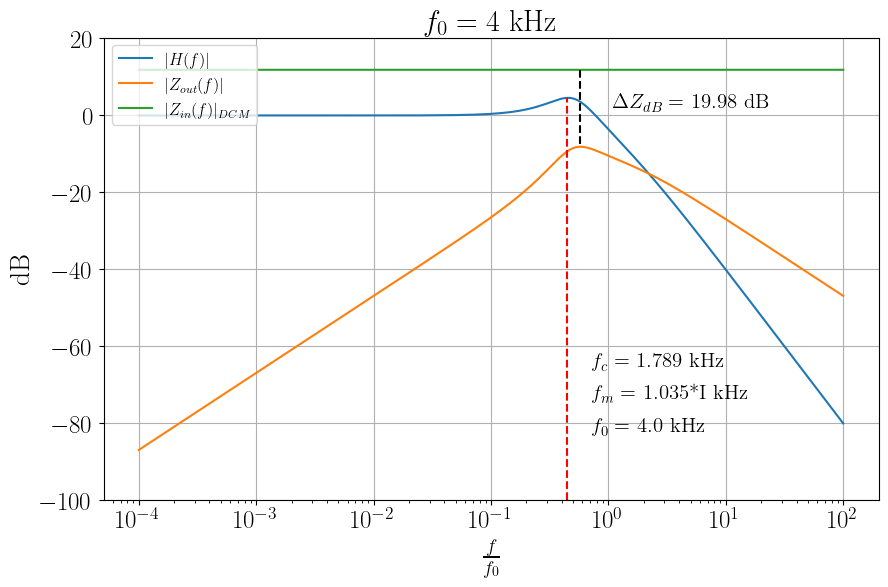

In [233]:
vin_min = 14     # In Ohms
pin_max = 50     # In Wats
fs_min  = 400e3  # In Hz

zin_min = - vin_min**2 / pin_max
fcross_min = fs_min/10
fc_min = fcross_min/10
zout_min = -1 * zin_min/10

nopt_ = 4
qopt_ = round(qopt.subs(n, nopt_).evalf(), 3)
r0opt_ = round(r0_opt.subs(n, nopt_).subs(zout, zout_min).evalf(), 3) 
copt_ = c_.subs(pi, 3.14).subs(r0, r0opt_).subs(fc, fc_min).evalf()
lopt_ = l_.subs(pi, 3.14).subs(r0, r0opt_).subs(fc, fc_min).evalf()
cdopt_ = copt_*nopt_
rdopt_ = r0opt_*qopt_
f_cut = fc_min * w0_deg.subs(n, nopt_).evalf()
zmax_ = round(z_max.subs(n, nopt_).subs(r0, r0opt_), 3)
fm_ = fm.subs(fc, f_cut).subs(q, qopt_).evalf()

display(Math("R_{in, \, min} = " + latex(zin_min) + " \,\,\Omega" + ", \,\,\,\,\,|Z_{out}|_{min} = " + latex(zout_min) + " \,\,\Omega"))
display(Math("f_{switch, \, min} = " + latex(int(fs_min*1e-3)) + " \,\,kHz" + ", \,\,\,\,\,f_{crossover, \, min} = " + latex(int(fcross_min*1e-3)) + " \,\,kHz" + ", \,\,\,\,\,f_{0} = " + latex(int(fc_min*1e-3)) + " \,\,kHz"))
display(Math(r"$n_{opt} = " + latex(nopt_) + r"$"))
display(Math(r"$Q_{opt} = " + latex(qopt_) + r"$"))
display(Math(r"$R_{0, opt} = " + latex(r0opt_) + r"\, \Omega$"))
display(Math(r"$C_{opt} = " + latex(round(copt_*1e6, 3)) + r"\, \mu F$" + r"$\,\,\,\,\,L_{opt} = " + latex(round(lopt_*1e6, 3)) + r"\, \mu H$"))
display(Math(r"$C_{d, opt} = " + latex(round(cdopt_*1e6, 3)) + r"\, \mu H$" + r"$\,\,\,\,\,R_{d, opt} = " + latex(rdopt_) + r"\, \Omega$"))
display(Math(r"$|Z_{out}|_{max} = " + latex(zmax_) + r"\, \Omega$"))
display(Math(r"$f_{cutoff} = " + latex(round(f_cut*1e-3, 3)) + r"\, kHz$"))
display(Math(r"$f_{m} = " + latex(round(fm_*1e-3, 3)) + r"\, kHz$"))

x_val = np.linspace(10**-4, 10**2, 8196)
habs = simplify(hq_abs.subs(q, qopt_).subs(n, nopt_).subs(r0, r0opt_))
habs = lambdify(x, habs, 'numpy')
h_val = 20*np.log10(habs(x_val))

zabs = simplify(zq_abs.subs(q, qopt_).subs(n, nopt_).subs(r0, r0opt_))
zabs = lambdify(x, zabs, 'numpy')
z_val = 20*np.log10(zabs(x_val))
z0_val = 20*np.log10(np.ones(len(z_val))*np.abs(zin_min))

# Find the maximum value of z_val and its corresponding x value
max_z_val = np.max(z_val)
max_z_val_index = np.argmax(z_val)
max_x_val = x_val[max_z_val_index]

# Calculate the difference
difference = max_z_val - z0_val[0]

# Create a larger figure
plt.figure(figsize=(10, 6))
# Plot the values
plt.plot(x_val, h_val, label=r'$|H(f)|$')
plt.plot(x_val, z_val, label=r'$|Z_{out}(f)|$')
plt.plot(x_val, z0_val, label=r'$|Z_{in}(f)|_{DCM}$')

ymin = -100
ymax = 20

h_cutoff_index = np.argmin(np.abs(x_val - f_cut/fc_min))

# Plot the vertical line
plt.plot([max_x_val, max_x_val], [z0_val[0], max_z_val], 'k--')
plt.plot([f_cut/fc_min, f_cut/fc_min], [ymin,  h_val[h_cutoff_index]], 'r--')

# Annotate the plot with the difference value
plt.annotate(r'$\Delta Z_{dB} = $ ' + f'{-difference:.2f} dB', xy=(max_x_val, (z0_val[0] + max_z_val) / 2), 
             xytext=(max_x_val + 0.5, max_z_val + 10), fontsize=15)
# Annotate the plot with the maximum x value
plt.annotate(r'$f_{c} = \,\,$' + f'{round(f_cut*1e-3, 3)} kHz', xy=(max_x_val, max_z_val), 
             xytext=(h_cutoff_index-36.27, ymin + (ymax - ymin) * 0.29), fontsize=15)
plt.annotate(r'$f_{m} = \,\,$' + f'{round(fm_*1e-3, 3)} kHz', xy=(max_x_val, max_z_val), 
             xytext=(h_cutoff_index-36.27, ymin + (ymax - ymin) * 0.22), fontsize=15)
plt.annotate(r'$f_{0} = \,\,$' + f'{round(fc_min*1e-3, 3)} kHz', xy=(h_cutoff_index, max_z_val), 
             xytext=(h_cutoff_index-36.27, ymin + (ymax - ymin) * 0.15), fontsize=15)

# Add labels and legend
plt.ylabel('dB', fontsize=20); plt.xlabel(r'$\frac{f}{f_0}$', fontsize=20)
plt.xscale('log')
plt.title(fr"$f_0 = {int(fc_min*1e-3)}$ kHz")
plt.legend(loc='center left', bbox_to_anchor=(0, 0.9), fontsize=12)
plt.grid();
plt.ylim([ymin, ymax]);

## ___Series-Damped LC Filter___

![Alt text](imgs/LC_series_damped.png)

In [266]:
# Defining Impedances for each Line
z1 = rl + s*l
z2 = rc + 1/s/c
z3 = rd + s*ld
# display(Math(latex(simplify(par(z1,z3).subs(rl, 0).subs(ld, n*l)))))

# Output Impedance and Transfer Function
z = par(par(z3,z1), z2)
h = z2/(z2+par(z1,z3))
z = simplify(z.factor(s))
h = simplify(h.factor(s))
z_ = simplify(z.subs(rl, 0).subs(rc, 0).subs(ld, n*l))
h_ = simplify(h.subs(rl, 0).subs(rc, 0).subs(ld, n*l))

# Taking Middelbrook substitutions
zq = simplify(r0*ps * (1+ps*n/q) / (1+ps*(n+1)/q+ps**2+ps**3*n/q))
zq_abs = abs(zq)
hq = simplify(zq/(ps*r0*(1+ps*n/q))*(1+ps*(1+n)/q))
hq_abs = abs(hq)

# Finding optimal x, Q, R0 and Maximum Output Impedance
xopt = xOpt(zq_abs, disp = False)[0]
qopt = qOpt(zq_abs, xopt, disp = False)[0]; qopt = simplify(qopt.factor(n))
z_max = simplify(zq_abs.subs(q, qopt).subs(x, xopt).factor(n))
r0_opt_ = solve(z_max - zout, r0); r0_opt = take_real(r0_opt_, show = False); #display(Math(latex(ro_opt_)))
n_opt_ = solve(z_max - zout, n); nopt = simplify(n_opt_[0]) #take_real(n_opt_, show = True); display(Math(latex(n_opt_)))

fm = fc * sqrt(1-1/2/q**2)

# Finding High Frequency Attenuation Degradation
w0_new = 1/sqrt(par(l,ld)*c)
w0_deg = simplify((w0_new/w0_).subs(ld, n*l))

c_ = 1 / (2*pi*fc*r0)
l_ = r0 / (2*pi*fc) 

# Defining Curves Z/R0 and f0_new/f0 for n
n_val = np.linspace(0.1, 10, 1024)
z_np = lambdify(n, z_max/r0, 'numpy')
w_np = lambdify(n, w0_deg, 'numpy')
z_val = 20*np.log10(z_np(n_val))
w_val = 20*np.log10(w_np(n_val))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

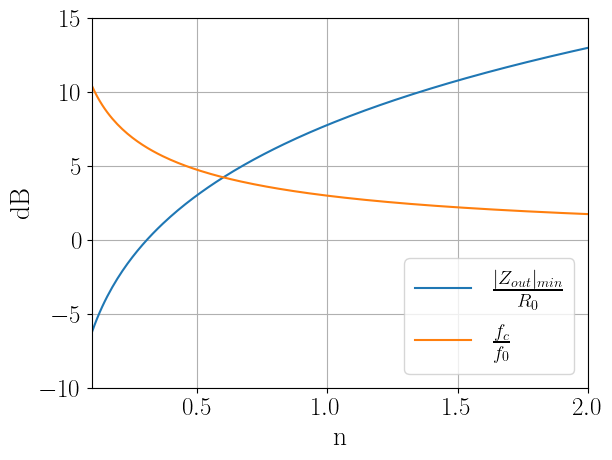

In [267]:
display(Math(r"$Z(s) = " + latex(z) + r"$"))
display(Math(r"$Z(s)|_{R_L, R_C = 0, C_d = nC} = " + latex(z_) + r"$"))
display(Math(r"$H(s)|_{R_L, R_C = 0, C_d = nC} = " + latex(h_) + r"$"))
display(Math(r"$Z(p, Q, n) = " + latex(zq) + r"$"))
display(Math(r"$x_{opt} = \frac{\omega}{\omega_0} = " + latex(xopt) + r"$"))
display(Math(r"$Q_{opt} = " + latex(qopt) + r"$"))
display(Math(r"$R_{0, opt} = " + latex(r0_opt) + r"$"))
display(Math(r"$n_{opt} = " + latex(nopt) + r"$"))
display(Math(r"$|Z_{out}|_{max} = " + latex(z_max) + r"$"))
display(Math(r"$\frac{f_{c, new}}{f_c} = " + latex(w0_deg) + r"$"))
display(Math(r"$f_m = " + latex(fm) + r", \,\,\,\,\, |Z(f = f_m)_{out}| = |Z_{out}|_{max}$"))
display(Math(r"$C = " + latex(c_) + r"$"))
display(Math(r"$L = " + latex(l_) + r"$"))
# display(Math(r"$" + latex() + r"$"))

print('\n\n')
plt.plot(n_val, z_val, label = r"$\frac{|Z_{out}|_{min}}{R_0}$")
plt.plot(n_val, w_val, label = r"$\frac{f_c}{f_0}$")
plt.grid(); plt.legend(fontsize = 20);
plt.xlabel('n', fontsize = 20); plt.ylabel('dB', fontsize = 20);
plt.xlim([min(n_val), 2]); plt.ylim([-10, 15]);

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

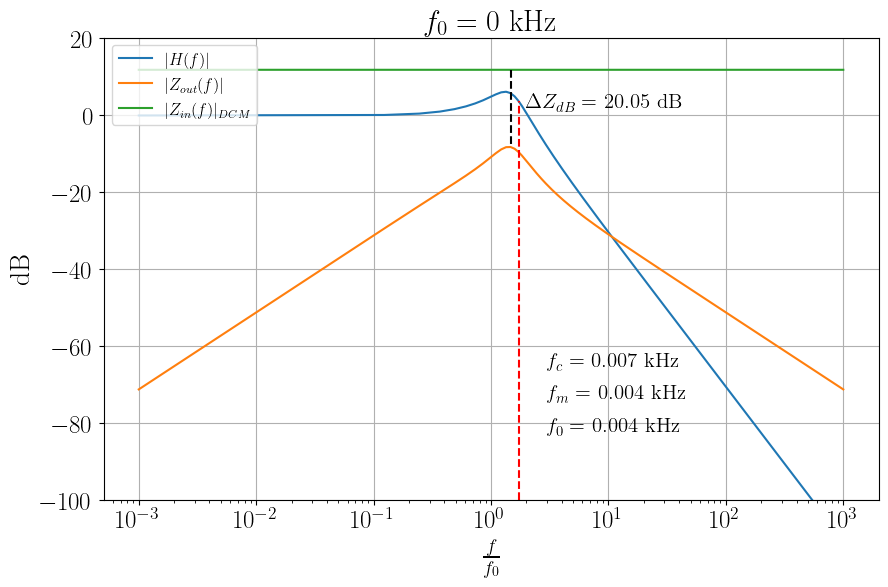

In [268]:
vin_min = 14     # In Ohms
pin_max = 50     # In Wats
fs_min  = 400e3  # In Hz

zin_min = - vin_min**2 / pin_max
fcross_min = fs_min/10
fc_min = 4#fcross_min/10
zout_min = -1 * zin_min/10

nopt_ = 0.5
qopt_ = round(qopt.subs(n, nopt_).evalf(), 3)
r0opt_ = round(r0_opt.subs(n, nopt_).subs(zout, zout_min).evalf(), 3) 
copt_ = c_.subs(pi, 3.14).subs(r0, r0opt_).subs(fc, fc_min).evalf()
lopt_ = l_.subs(pi, 3.14).subs(r0, r0opt_).subs(fc, fc_min).evalf()
ldopt_ = lopt_*nopt_
rdopt_ = r0opt_*qopt_
f_cut = fc_min * w0_deg.subs(n, nopt_).evalf()
zmax_ = round(z_max.subs(n, nopt_).subs(r0, r0opt_), 3)
fm_ = fm.subs(fc, f_cut).subs(q, qopt_).evalf()


display(Math("R_{in, \, min} = " + latex(zin_min) + " \,\,\Omega" + ", \,\,\,\,\,|Z_{out}|_{min} = " + latex(zout_min) + " \,\,\Omega"))
display(Math("f_{switch, \, min} = " + latex(int(fs_min*1e-3)) + " \,\,kHz" + ", \,\,\,\,\,f_{crossover, \, min} = " + latex(int(fcross_min*1e-3)) + " \,\,kHz" + ", \,\,\,\,\,f_{0} = " + latex(int(fc_min*1e-3)) + " \,\,kHz"))
display(Math(r"$n_{opt} = " + latex(nopt_) + r"$"))
display(Math(r"$Q_{opt} = " + latex(qopt_) + r"$"))
display(Math(r"$R_{0, opt} = " + latex(r0opt_) + r"\, \Omega$"))
display(Math(r"$C_{opt} = " + latex(round(copt_*1e6, 3)) + r"\, \mu F$" + r"$\,\,\,\,\,L_{opt} = " + latex(round(lopt_*1e6, 3)) + r"\, \mu H$"))
display(Math(r"$L_{d, opt} = " + latex(round(ldopt_*1e6, 3)) + r"\, \mu H$" + r"$\,\,\,\,\,R_{d, opt} = " + latex(rdopt_) + r"\, \Omega$"))
display(Math(r"$|Z_{out}|_{max} = " + latex(zmax_) + r"\, \Omega$"))
display(Math(r"$f_{cutoff} = " + latex(round(f_cut*1e-3, 3)) + r"\, kHz$"))
display(Math(r"$f_{m} = " + latex(round(fm_*1e-3, 3)) + r"\, kHz$"))

x_val = np.linspace(10e-4, 10e2, 8196)
habs = simplify(hq_abs.subs(q, qopt_).subs(n, nopt_).subs(r0, r0opt_))
habs = lambdify(x, habs, 'numpy')
h_val = 20*np.log10(habs(x_val))

zabs = simplify(zq_abs.subs(q, qopt_).subs(n, nopt_).subs(r0, r0opt_))
zabs = lambdify(x, zabs, 'numpy')
z_val = 20*np.log10(zabs(x_val))
z0_val = 20*np.log10(np.ones(len(z_val))*np.abs(zin_min))

# Find the maximum value of z_val and its corresponding x value
max_z_val = np.max(z_val)
max_z_val_index = np.argmax(z_val)
max_x_val = x_val[max_z_val_index]

# Calculate the difference
difference = max_z_val - z0_val[0]

# Create a larger figure
plt.figure(figsize=(10, 6))
# Plot the values
plt.plot(x_val, h_val, label=r'$|H(f)|$')
plt.plot(x_val, z_val, label=r'$|Z_{out}(f)|$')
plt.plot(x_val, z0_val, label=r'$|Z_{in}(f)|_{DCM}$')

ymin = -100
ymax = 20

h_cutoff_index = np.argmin(np.abs(x_val - f_cut/fc_min))

# Plot the vertical line
plt.plot([max_x_val, max_x_val], [z0_val[0], max_z_val], 'k--')
plt.plot([f_cut/fc_min, f_cut/fc_min], [ymin,  h_val[h_cutoff_index]], 'r--')

# Annotate the plot with the difference value
plt.annotate(r'$\Delta Z_{dB} = $ ' + f'{-difference:.2f} dB', xy=(max_x_val, (z0_val[0] + max_z_val) / 2), 
             xytext=(max_x_val + 0.5, max_z_val + 10), fontsize=15)
# Annotate the plot with the maximum x value
plt.annotate(r'$f_{c} = \,\,$' + f'{round(f_cut*1e-3, 3)} kHz', xy=(max_x_val, max_z_val), 
             xytext=(h_cutoff_index-11, ymin + (ymax - ymin) * 0.29), fontsize=15)
plt.annotate(r'$f_{m} = \,\,$' + f'{round(fm_*1e-3, 3)} kHz', xy=(max_x_val, max_z_val), 
             xytext=(h_cutoff_index-11, ymin + (ymax - ymin) * 0.22), fontsize=15)
plt.annotate(r'$f_{0} = \,\,$' + f'{round(fc_min*1e-3, 3)} kHz', xy=(h_cutoff_index, max_z_val), 
             xytext=(h_cutoff_index-11, ymin + (ymax - ymin) * 0.15), fontsize=15)

# Add labels and legend
plt.ylabel('dB', fontsize=20); plt.xlabel(r'$\frac{f}{f_0}$', fontsize=20)
plt.xscale('log')
plt.title(fr"$f_0 = {int(fc_min*1e-3)}$ kHz")
plt.legend(loc='center left', bbox_to_anchor=(0, 0.9), fontsize=12)
plt.grid();
plt.ylim([ymin, ymax]);

## ___Series-Damped LC Filter___ with Parallel Bypass inductor
 
![Alt text](imgs/LC_series_damped_2.png)

In [243]:
# Defining Impedances for each Line
z1 = rl + s*l
z2 = rc + 1/s/c
z3 = par(rd, s*ld)
# display(Math(latex(simplify((z1+z3).subs(rl, 0).subs(ld, n*l)))))

# Output Impedance and Transfer Function
z = par(z1+z3, z2)
h = z2/(z2+z1+z3)
z = simplify(z.factor(s))
h = simplify(h.factor(s))
z_ = simplify(z.subs(rl, 0).subs(rc, 0).subs(ld, n*l))
h_ = simplify(h.subs(rl, 0).subs(rc, 0).subs(ld, n*l))
# display(Math(latex(z_)))

# Taking Middelbrook substitutions
zq = simplify(r0*ps*(ps*n/q+(1+n)) / (1+ps*n/q + ps**2*(n+1)+ps**3*n/q))
zq_abs = abs(zq)
hq = simplify(zq/(ps*r0*(ps*n/q+(1+n)))*(1+ps*n/q))
hq_abs = abs(hq)

# Finding optimal x, Q, R0 and Maximum Output Impedance
xopt = xOpt(zq_abs, disp = False)[0]
qopt = qOpt(zq_abs, xopt, disp = False)[0]; qopt = simplify(qopt.factor(n))
z_max = simplify(zq_abs.subs(q, qopt).subs(x, xopt).factor(n))
r0_opt_ = solve(z_max - zout, r0); r0_opt = take_real(r0_opt_, show = False); #display(Math(latex(ro_opt_)))
n_opt_ = solve(z_max - zout, n); nopt = simplify(n_opt_[0]) #take_real(n_opt_, show = True); display(Math(latex(n_opt_)))

fm = fc * sqrt(1-1/2/q**2)

# Finding High Frequency Attenuation Degradation
w0_new = 1/sqrt(par(l,ld)*c)
w0_deg = simplify((w0_new/w0_).subs(ld, n*l))

c_ = 1 / (2*pi*fc*r0)
l_ = r0 / (2*pi*fc) 

# Defining Curves Z/R0 and f0_new/f0 for n
n_val = np.linspace(0.1, 10, 1024)
z_np = lambdify(n, z_max/r0, 'numpy')
w_np = lambdify(n, w0_deg, 'numpy')
z_val = 20*np.log10(z_np(n_val))
w_val = 20*np.log10(w_np(n_val))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

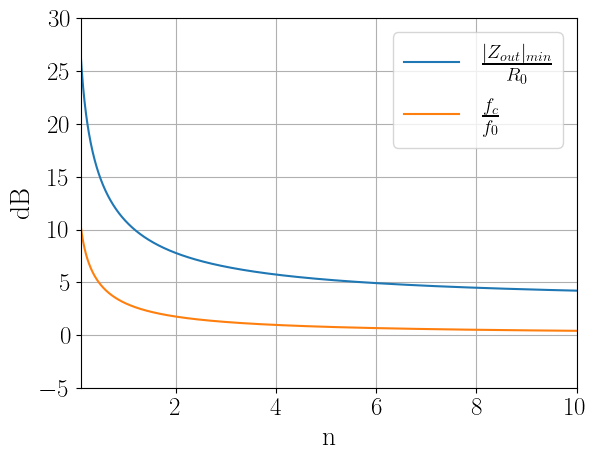

In [246]:
display(Math(r"$Z(s) = " + latex(z) + r"$"))
display(Math(r"$Z(s)|_{R_L, R_C = 0, C_d = nC} = " + latex(z_) + r"$"))
display(Math(r"$H(s)|_{R_L, R_C = 0, C_d = nC} = " + latex(h_) + r"$"))
display(Math(r"$Z(p, Q, n) = " + latex(zq) + r"$"))
display(Math(r"$x_{opt} = \frac{\omega}{\omega_0} = " + latex(xopt) + r"$"))
display(Math(r"$Q_{opt} = " + latex(qopt) + r"$"))
display(Math(r"$R_{0, opt} = " + latex(r0_opt) + r"$"))
display(Math(r"$n_{opt} = " + latex(nopt) + r"$"))
display(Math(r"$|Z_{out}|_{max} = " + latex(z_max) + r"$"))
display(Math(r"$\frac{f_{c, new}}{f_c} = " + latex(w0_deg) + r"$"))
display(Math(r"$f_m = " + latex(fm) + r", \,\,\,\,\, |Z(f = f_m)_{out}| = |Z_{out}|_{max}$"))
display(Math(r"$C = " + latex(c_) + r"$"))
display(Math(r"$L = " + latex(l_) + r"$"))
# display(Math(r"$" + latex() + r"$"))

print('\n\n')
plt.plot(n_val, z_val, label = r"$\frac{|Z_{out}|_{min}}{R_0}$")
plt.plot(n_val, w_val, label = r"$\frac{f_c}{f_0}$")
plt.grid(); plt.legend(fontsize = 20);
plt.xlabel('n', fontsize = 20); plt.ylabel('dB', fontsize = 20);
plt.xlim([min(n_val), 10]); plt.ylim([-5, 30]);

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

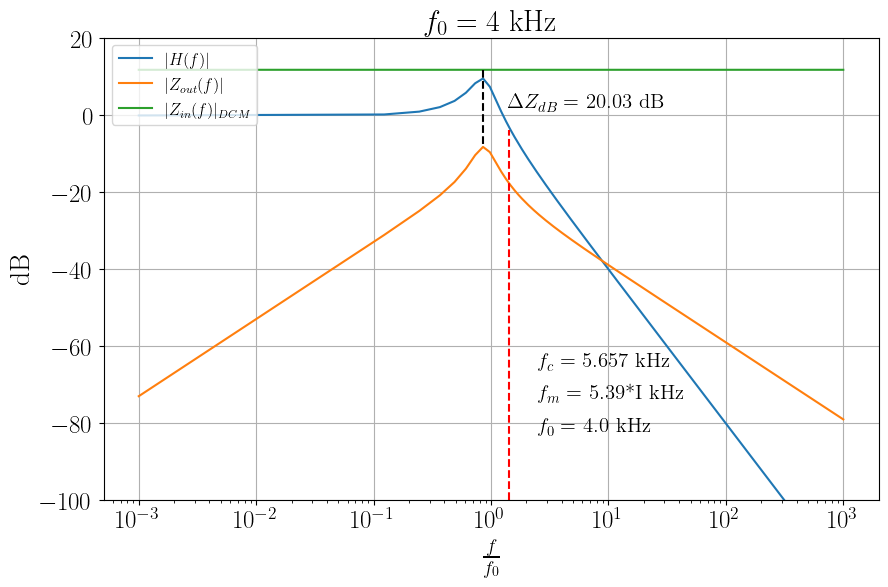

In [252]:
vin_min = 14     # In Ohms
pin_max = 50     # In Wats
fs_min  = 400e3  # In Hz

zin_min = - vin_min**2 / pin_max
fcross_min = fs_min/10
fc_min = fcross_min/10
zout_min = -1 * zin_min/10

nopt_ = 1
qopt_ = round(qopt.subs(n, nopt_).evalf(), 3)
r0opt_ = round(r0_opt.subs(n, nopt_).subs(zout, zout_min).evalf(), 3) 
copt_ = c_.subs(pi, 3.14).subs(r0, r0opt_).subs(fc, fc_min).evalf()
lopt_ = l_.subs(pi, 3.14).subs(r0, r0opt_).subs(fc, fc_min).evalf()
ldopt_ = lopt_*nopt_
rdopt_ = r0opt_*qopt_
f_cut = fc_min * w0_deg.subs(n, nopt_).evalf()
zmax_ = round(z_max.subs(n, nopt_).subs(r0, r0opt_), 3)
fm_ = fm.subs(fc, f_cut).subs(q, qopt_).evalf()


display(Math("R_{in, \, min} = " + latex(zin_min) + " \,\,\Omega" + ", \,\,\,\,\,|Z_{out}|_{min} = " + latex(zout_min) + " \,\,\Omega"))
display(Math("f_{switch, \, min} = " + latex(int(fs_min*1e-3)) + " \,\,kHz" + ", \,\,\,\,\,f_{crossover, \, min} = " + latex(int(fcross_min*1e-3)) + " \,\,kHz" + ", \,\,\,\,\,f_{0} = " + latex(int(fc_min*1e-3)) + " \,\,kHz"))
display(Math(r"$n_{opt} = " + latex(nopt_) + r"$"))
display(Math(r"$Q_{opt} = " + latex(qopt_) + r"$"))
display(Math(r"$R_{0, opt} = " + latex(r0opt_) + r"\, \Omega$"))
display(Math(r"$C_{opt} = " + latex(round(copt_*1e6, 3)) + r"\, \mu F$" + r"$\,\,\,\,\,L_{opt} = " + latex(round(lopt_*1e6, 3)) + r"\, \mu H$"))
display(Math(r"$L_{d, opt} = " + latex(round(ldopt_*1e6, 3)) + r"\, \mu H$" + r"$\,\,\,\,\,R_{d, opt} = " + latex(rdopt_) + r"\, \Omega$"))
display(Math(r"$|Z_{out}|_{max} = " + latex(zmax_) + r"\, \Omega$"))
display(Math(r"$f_{cutoff} = " + latex(round(f_cut*1e-3, 3)) + r"\, kHz$"))
display(Math(r"$f_{m} = " + latex(round(fm_*1e-3, 3)) + r"\, kHz$"))

x_val = np.linspace(10e-4, 10e2, 8196)
habs = simplify(hq_abs.subs(q, qopt_).subs(n, nopt_).subs(r0, r0opt_))
habs = lambdify(x, habs, 'numpy')
h_val = 20*np.log10(habs(x_val))

zabs = simplify(zq_abs.subs(q, qopt_).subs(n, nopt_).subs(r0, r0opt_))
zabs = lambdify(x, zabs, 'numpy')
z_val = 20*np.log10(zabs(x_val))
z0_val = 20*np.log10(np.ones(len(z_val))*np.abs(zin_min))

# Find the maximum value of z_val and its corresponding x value
max_z_val = np.max(z_val)
max_z_val_index = np.argmax(z_val)
max_x_val = x_val[max_z_val_index]

# Calculate the difference
difference = max_z_val - z0_val[0]

# Create a larger figure
plt.figure(figsize=(10, 6))
# Plot the values
plt.plot(x_val, h_val, label=r'$|H(f)|$')
plt.plot(x_val, z_val, label=r'$|Z_{out}(f)|$')
plt.plot(x_val, z0_val, label=r'$|Z_{in}(f)|_{DCM}$')

ymin = -100
ymax = 20

h_cutoff_index = np.argmin(np.abs(x_val - f_cut/fc_min))

# Plot the vertical line
plt.plot([max_x_val, max_x_val], [z0_val[0], max_z_val], 'k--')
plt.plot([f_cut/fc_min, f_cut/fc_min], [ymin,  h_val[h_cutoff_index]], 'r--')

# Annotate the plot with the difference value
plt.annotate(r'$\Delta Z_{dB} = $ ' + f'{-difference:.2f} dB', xy=(max_x_val, (z0_val[0] + max_z_val) / 2), 
             xytext=(max_x_val + 0.5, max_z_val + 10), fontsize=15)
# Annotate the plot with the maximum x value
plt.annotate(r'$f_{c} = \,\,$' + f'{round(f_cut*1e-3, 3)} kHz', xy=(max_x_val, max_z_val), 
             xytext=(h_cutoff_index-9.5, ymin + (ymax - ymin) * 0.29), fontsize=15)
plt.annotate(r'$f_{m} = \,\,$' + f'{round(fm_*1e-3, 3)} kHz', xy=(max_x_val, max_z_val), 
             xytext=(h_cutoff_index-9.5, ymin + (ymax - ymin) * 0.22), fontsize=15)
plt.annotate(r'$f_{0} = \,\,$' + f'{round(fc_min*1e-3, 3)} kHz', xy=(h_cutoff_index, max_z_val), 
             xytext=(h_cutoff_index-9.5, ymin + (ymax - ymin) * 0.15), fontsize=15)

# Add labels and legend
plt.ylabel('dB', fontsize=20); plt.xlabel(r'$\frac{f}{f_0}$', fontsize=20)
plt.xscale('log')
plt.title(fr"$f_0 = {int(fc_min*1e-3)}$ kHz")
plt.legend(loc='center left', bbox_to_anchor=(0, 0.9), fontsize=12)
plt.grid();
plt.ylim([ymin, ymax]);

## ___Simplified Series-Damped LC Filter___

![Alt text](imgs/LC_series_damped_simplified.png)

In [264]:
def abs_(z):
    z_i = simplify(z.subs(s, I*w))
    z_re = simplify(re(z_i))
    z_im = simplify(im(z_i))
    z_abs = simplify(sqrt(z_re**2 + z_im**2))
    return z_abs

# Defining Impedances for each Line
z1 = rd
z2 =rl + s*l
z3 = rc + 1/s/c
# display(Math(latex(simplify(par(z1,z2).subs(rl, 0).subs(ld, n*l)))))

# Output Impedance and Transfer Function
z = par(z3,par(z1,z2))
h = z3/par(z1,z2)
z = simplify(z.factor(s))
h = simplify(h.factor(s))
z_ = simplify(z.subs(rl, 0).subs(rc, 0))
h_ = simplify(h.subs(rl, 0).subs(rc, 0))
# display(Math(latex(z_)))

# zabs = abs_(z_)
# display(Math(latex(zabs)))


# Taking Middelbrook substitutions
zq = simplify((ps*r0) / (1+ps/q+ps**2))
zq_abs = abs(zq)
display(Math(latex(simplify(diff(zq_abs, x)))))
hq = simplify(zq/(ps*r0)*(1+ps/q))
hq_abs = abs(hq)



<IPython.core.display.Math object>

<IPython.core.display.Math object>